In [1]:
knitr::opts_chunk$set(echo = TRUE, results="hide", eval=FALSE)

## A. Tests d'hypothèses
### 1. Tests paramétriques

Pour les échantillons iid $X_i\sim \mathcal{N} (\mu, \sigma^2), i=1,\ldots, n$,
considerons un test d'hypothèse simple
$H_0: \mu = \mu_0 \quad$ vs $\quad H_1: \mu = \mu_1$
où $\mu_1 > \mu_0$ et $\sigma=\sigma_0$ est connu. Pour $\mathbf{X} = (X_1,\ldots, X_n)$ donné, nous savons que le test de Neyman-Pearson (NP) rejeté $H_0$ si 
$T(\textbf{X}) > k_\alpha $
pour une valeur seuil appropriée $k_\alpha$. On rappelle que
$\alpha = P_{H_0}(T(\mathbf{X}) > k_\alpha) \quad \beta = P_{H_1}(T(\mathbf{X})> k_\alpha)$
Celles-ci donnent des garanties théoriques pour contrôler les erreurs de décision, $\alpha$ et $1-\beta$.


**Ex1.** Nous voulons construire un test NP. Donner la statistique de test $T(\mathbf{X})$.

**Ex2.** Étant donné $n=50, \sigma_0 = 1, \mu_0 = 0, \mu_1 = 0.1$, évaluer les valeurs théoriques pour $k_\alpha$ et $\beta$. Quelle est l'interprétation de ces valeurs $\alpha$ et $\beta$?

**Ex3.** Simuler des données avec le paramètre ci-dessus et effectuer le test de niveau $\alpha=0.1$ $M=100$ fois. Donnez un approxmation de $\alpha$ et $\beta$.
Le test contrôle-t-il l'erreur comme promis ? 

In [ ]:
alp <- 0.1
nsimu <- 100
n <-50
mu0 <- 0
mu1<-0.1
sig0 <- 1
Kalpha <- ...
beta <- ...
N_alpha <- c()
N_beta <- c()
for(simu in 1:nsimu){
  X0 <- rnorm(n,mu0,sig0)
  X1 <- rnorm(n,mu1,sig0)
  N_alpha <- append(N_alpha,mean(X0)>Kalpha)
  N_beta <- append(N_beta,mean(X1)>Kalpha)
}
alpha_estim <- mean(N_alpha)
beta_estim <- mean(N_beta)
print(c("estmation de alpha :",alpha_estim))
print(c("estmation de beta :",beta_estim))

Comment peut-on interpreter le plot suivant ?

In [ ]:
alphas <- seq(0,1,0.1)
betas <- pnorm((mu1-mu0)*sqrt(n)/sig0 + qnorm(alpha,0,1),0,1)
plot(alphas,betas,ylab = "beta",xlab="alpha")

**Ex4.** Au lieu de déterminer $k_\alpha$ pour les tests, nous pouvons calculer la valeur $p$, définie comme
\[
p_{val} = P_{H_0}(T(\mathbf{X}) > T(\mathbf{x}))
\]
où $T(\mathbf{x})$ est la statistique du test observée.
Expliquer comment utiliser la valeur $p$ pour établir une règle de décision pour le test.

**Ex5.** Consideron le cas où $\sigma$ est inconnu, quell est la statistique de test ? Y a-t-il une différence dans votre conclusion?

## 2. Construction d'un test statistique par simulation

Un test d'hypothèse valide exige que nous rejetions incorrectement l'hypothèse nulle une proportion appropriée du temps (par exemple, au plus 5% de fois).

Losque nous disposons d'une statistique de test $T(\mathbf{X})$, et que nous souhaitons rejecter l'hypothèse nulle $H_0$ si $T(\mathbf{X})$ est plus grande (ou plus petite) qu'un certain seuil, alors pour avoir un test de niveau $\alpha$, il faut calculer le seuil $k_\alpha$ tel que
$\Pr(T(\mathbf{X})> k_\alpha |$ Hypothèse nulle vraie $) = \alpha$.
Cependant, si nous ne pouvons pas calculer $k_\alpha$ de manière analytique (c'est-à-dire via une formule exacte), nous pouvons utiliser la simulation pour estimer $k_\alpha$. 
Ce que nous devons faire est de simuler des ensembles de données répliqués sous l'hypothèse Nulle.}

*Noter que pour implémenter un test d’hypothèse basé sur la simulation, il suffit de pouvoir simuler des données sous l’hypothèse nulle. On n’a pas besoin de connaître analytiquement la loi de la statistique de test. Dans de nombreuses disciplines scientifiques, cette approche est très utilisée. Les chercheurs choisissent une statistique de test qui réflète bien l'effet ou le phénomène qu'ils cherchent à détecter et utilisent la simulation pour calculer la valeur seuil à partir de la distribution empirique de la statistique choisie sous l'hypothèse nulle.*

### Test d'ajustement de Kolmogorov

Nous pouvons appliquer la stratégie de simulation pour évaluer la pertinence des modèles statistiques vis-à-vis des données observées. 

Soit $X_1,\ldots, X_n$ un échantillon de loi inconnue $P_{\boldsymbol{\theta}}$ de fonction de répartition $F$ supposée continue. L’objectif du test de Kolmogorov est l’ajustement de la loi inconnue $P$ à une loi connue $P_0$ de fonction de répartition continue $F_0$:
$H_0: F = F_0 \qquad H_1: F \neq F_0$

**Ex6.** Supposons que $P_0 = \mathcal{N}(\mu, \sigma)$ avec $\theta=(\mu, \sigma)$ sont connus, construire le test de Kolmogorov (Kolmogorov-Smirnov) de niveau $\alpha$ (sur la base de l'approximation asymmtotique).

In [80]:
### Remplir la fonction suivante pour calculer la statistique de test Kolmogorov
ks_stat <- function(x, mu, sigma) {
  x_ord <- sort(x)
  n <- length(x) # taille de l'échantillon
  F_emp <- (1:n) / n # calculer la distribution empirique
  F_theo <- pnorm(x_ord, mean = mu, sd = sigma) # calculer la distribution theorique
  D <- max(abs(F_emp - F_theo)) #calcule de la KS distance
  return(D)
}

In [58]:
## Prenez mu et sigma a votre choix
mu = 1
sigma = 1 
n = 1000 # sinon object 'n' not found
x_obs = rnorm(n, mean = mu, sd = sigma)  # générer une observation de modèle choisi.
D_obs <- ks_stat(x=x_obs, mu= mu, sigma=sigma) # calculer la KS statistique
###les valeurs critiques
alp = 0.05
c_alpha = 1.36 ## le quantile (1-alpha) de la loi Kolmogorov
k_a = c_alpha/sqrt(n)
###Conclusion
if (D_obs > k_a) { # il fallait remplacer ici par rapport à l'énoncé
  cat("On rejette H0 : D_n =", D_obs, "> valeur critique =", k_a, "\n")
} else {
  cat("On ne rejette pas H0 : D_n =", D_obs, "<= valeur critique =", k_a, "\n")
}

On ne rejette pas H0 : D_n = 0.01583644 <= valeur critique = 0.04300698 


**Ex7.** Utiliser la fonction `ks.test()` en `R` pour effectuer le test, puis comparer les résultats avec ceux obtenus dans l'exercice précédent.

In [ ]:
ks_result <- ks.test(x_obs, "pnorm", mean = mu, sd = sigma)
print(ks_result)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x_obs
D = 0.015836, p-value = 0.9634
alternative hypothesis: two-sided



La statistique D est proche dans le test manuel et avec ks.test
La p valeur est supérieure à 0.05 donc on ne rejette pas H0, comme avant

**Ex8.** Supposons que le modèle le mieux adjusté ait la valeur de paramètre $\hat{\boldsymbol{\theta}}$. Soit $F_0$ la fonction de répartition du modèle ajusté $P_{\hat{\boldsymbol{\theta}}}$.

Notons que lorsque $\hat{\theta} = (\hat{\mu},\hat{\sigma})$ est estimé à partir des données, l’approximation asymptotique standard de Kolmogorov–Smirnov n’est plus valide. La distribution limite de la statistique de Kolmogorov–Smirnov dépend de la méthode d’estimation et du modèle sous-jacent. Nous voulons donc proposer une méthode alternative.

Construire un test Kolmogorov par une méthode alternative basée sur la simulation.

In [62]:
mu_hat <- mean(x_obs)
sigma_hat <- sd(x_obs)
simu <- 1000
D_sim <- numeric(simu)

for (s in 1:simu) {
  # Générer des données sous H0
  x_sim <- rnorm(n, mean = mu_hat, sd = sigma_hat)

  # Réestimer les paramètres sur l’échantillon simulé
  mu_sim <- mean(x_sim)
  sigma_sim <- sd(x_sim)

  # Calculer la stat KS
  D_sim[s] <- ks_stat(x=x_sim, mu=mu_sim, sigma=sigma_sim)
}

## Calcul de la valeur critique et décision
quantile_alpha <- quantile(x=D_sim, probs= 1-alp) 

## Conclusion
if (D_obs > quantile_alpha) { # il fallait remplacer ici par rapport à l'énoncé
  cat("On rejette H0 : D_n =", D_obs, "> valeur critique =", k_a, "\n")
} else {
  cat("On ne rejette pas H0 : D_n =", D_obs, "<= valeur critique =", k_a, "\n")
}

On ne rejette pas H0 : D_n = 0.01583644 <= valeur critique = 0.04300698 


## B. Application: Air quality monitoring

[Airparif](https://airparif.asso.fr) exploite un système de surveillance de la qualité de l'air avec un réseau de sites dans la région de la capitale (Ile de France) sur lesquels les mesures de la qualité de l'air sont effectuées automatiquement. Ces mesures sont utilisées pour résumer les niveaux actuels de pollution atmosphérique, pour prévoir les niveaux futurs et pour fournir des données pour la recherche scientifique, contribuant à l'évaluation des risques pour la santé et des impacts environnementaux des polluants atmosphériques.

Nous examinerons *l'ozone troposphérique* ($O_3$). Ce polluant n'est pas émis directement dans l'atmosphère, mais est produit par des réactions chimiques entre le dioxyde d'azote ($NO_2$), les hydrocarbures et la lumière du soleil. Nous nous concentrerons sur les données de deux sites de surveillance: un site urbain à Neuilly-sur-seine (**NEUIL**) et un site rural (**RUR.SE**) près de la forêt de Fontainbleu.

Les données de chaque site sont des mesures quotidiennes de la concentration moyenne horaire maximale de $O_3$ enregistrée en microgrammes par mètre cube ($\mu g/m^3$), de 2014 à 2019 inclusivement. Pour nous concentrer sur la question de la saison, nous comparons les données de *hiver* (novembre-février inclus) (`Ozone_hiver.csv`) et *été* (mai - août inclus) (`Ozone_ete.csv`).

Nous souhaitons savoir comment la distribution des mesures de l'ozone varie-t-elle entre les sites urbains et ruraux. Nous désignons les données sur l'ozone du site urbain par $X_i$ et le site rural par $Y_i$, $i=1,\ldots,n$, l'indice indiquant les $n$ jours différents pour lesquels nous avons des mesures et définissons la variable $D_i = X_i-Y_i$ pour la difference.

Télécharger les fichiers `Ozone_hiver.csv` et `Ozone_ete.csv` et les placer dans la même répétoire de votre espace de travail courant. Utiliser les codes suivant pour importer les données

In [65]:
setwd(".")
Hiver = read.csv("Ozone_hiver.csv")
Ete = read.csv("Ozone_ete.csv")

head(Hiver)
head(Ete)

,date2,NEUIL,RUR.SE
,<chr>,<int>,<int>
1,2014-11-03,42,70
2,2014-11-04,51,62
3,2014-11-05,31,51
4,2014-11-06,36,62
5,2014-11-07,58,72
6,2014-11-08,40,67


,date2,NEUIL,RUR.SE
,<chr>,<int>,<int>
1,2015-05-01,61,58
2,2015-05-02,56,69
3,2015-05-03,72,54
4,2015-05-04,66,71
5,2015-05-05,73,84
6,2015-05-06,76,73


In [66]:
X_hiver = Hiver[,'NEUIL']; Y_hiver = Hiver[,'RUR.SE']
X_ete= Ete[,'NEUIL']; Y_ete = Ete[,'RUR.SE']

**Ex9.** Appliquer l'analyse exploratoire des données (TPs 1-2) et suggérer un modèle approprié pour $D_i$.

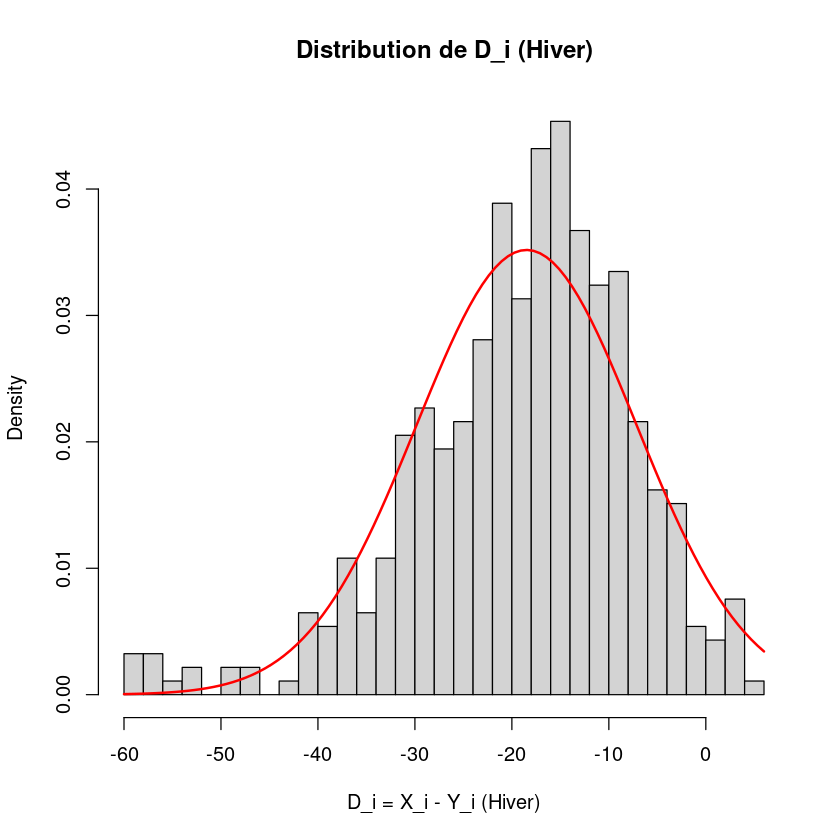

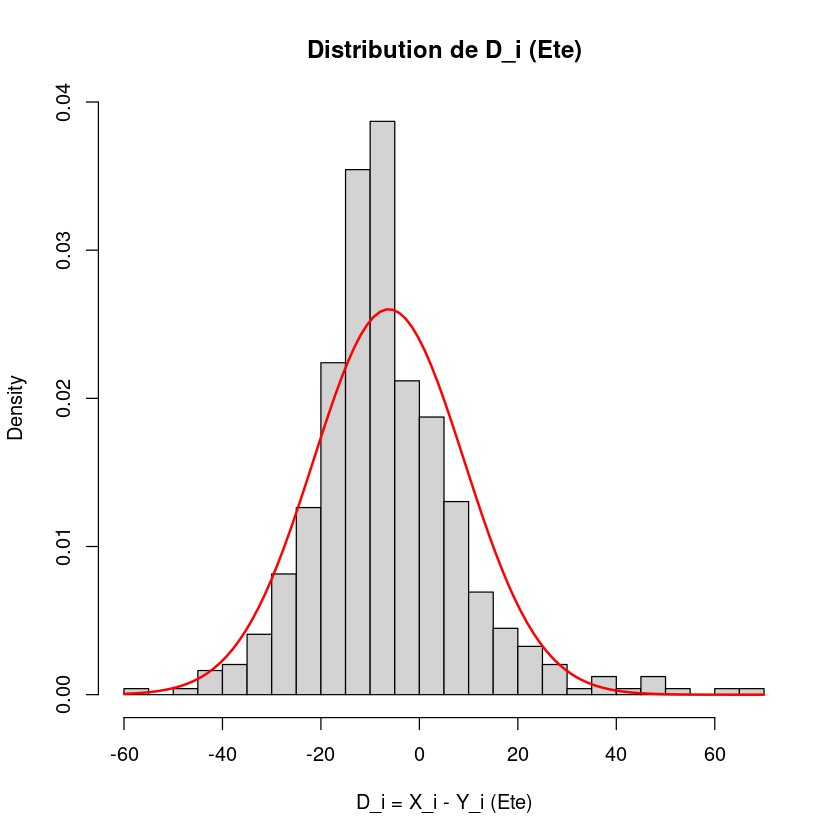

In [ ]:
# Création des variables D_i pour l'hiver et l'été
D_hiver = X_hiver - Y_hiver
D_ete = X_ete - Y_ete

# Visualisation des distributions de D_i pour l'hiver et l'été
# Modèle choisi : loi normale

# Histogramme de D_hiver avec superposition de la loi normale
mu_hiver <- mean(D_hiver)
sigma_hiver <- sd(D_hiver)
hist(D_hiver, main = "Distribution de D_i (Hiver)", xlab = "D_i = X_i - Y_i (Hiver)", breaks = 30, prob = TRUE)
curve(dnorm(x, mean = mu_hiver, sd = sigma_hiver), add = TRUE, col = "red", lwd = 2)

# Histogramme de D_ete avec superposition de la loi normale
mu_ete <- mean(D_ete)
sigma_ete <- sd(D_ete)
hist(D_ete, main = "Distribution de D_i (Ete)", xlab = "D_i = X_i - Y_i (Ete)", breaks = 30, prob = TRUE)
curve(dnorm(x, mean = mu_ete, sd = sigma_ete), add = TRUE, col = "red", lwd = 2)



**Ex10.** En supposant que les différences $D_i$ forment un échantillon iid suivant une loi normale $N(\mu, \sigma^2)$, quelle est l'hypothèse sous-jacente que nous voulons tester ? Définir $H_0$ et $H_1$ et effectuez le test pour les données en été et en hiver séparément. Quelle est la conclusion?

**Hypothèse de rejet/nulle** ($H_0$) : $D_i\sim\mathcal{N}(\mu,\sigma^2)$

**Hypothèse de test** ($H_1$) : $D_i\cancel\sim\mathcal{N}(\mu,\sigma^2)$

In [93]:
# En prenant exemple sur le test de Kolmogorov-Smirnov précédent, on va tester si les données D_hiver et D_ete suivent une loi normale avec des paramètres estimés à partir des données observées.

# Estimation des paramètres des données observées
mu_hiver <- mean(D_hiver)
sigma_hiver <- sd(D_hiver)

mu_ete <- mean(D_ete)
sigma_ete <- sd(D_ete)

# Nombre de simulations
simu <- 1000

# Initialisation des vecteurs pour stocker les valeurs de la statistique KS
D_sim_hiver <- numeric(simu)
D_sim_ete <- numeric(simu)

# Simulation pour l'hiver
for (s in 1:simu) {
  # Générer des données simulées sous H0 (loi normale avec mu_hiver et sigma_hiver)
  D_sim <- rnorm(n, mean = mu_hiver, sd = sigma_hiver)
  
  # Réestimer les paramètres sur l'échantillon simulé
  mu_sim_hiver <- mean(D_sim)
  sigma_sim_hiver <- sd(D_sim)
  
  # Calculer la statistique KS pour l'hiver (en comparant avec la loi normale théorique)
  D_sim_hiver[s] <- ks_stat(x = D_sim, mu = mu_sim_hiver, sigma = sigma_sim_hiver)
}

# Simulation pour l'été
for (s in 1:simu) {
  # Générer des données simulées sous H0 (loi normale avec mu_ete et sigma_ete)
  D_sim <- rnorm(n, mean = mu_ete, sd = sigma_ete)
  
  # Réestimer les paramètres sur l'échantillon simulé
  mu_sim_ete <- mean(D_sim)
  sigma_sim_ete <- sd(D_sim)
  
  # Calculer la statistique KS pour l'été
  D_sim_ete[s] <- ks_stat(x = D_sim, mu = mu_sim_ete, sigma = sigma_sim_ete)
}

# Calcul des valeurs critiques
alp <- 0.05 # standard
quantile_hiver <- quantile(D_sim_hiver, probs = 1 - alp)
quantile_ete <- quantile(D_sim_ete, probs = 1 - alp)

# Statistiques KS observées
D_obs_hiver <- ks_stat(D_hiver, mu = mu_hiver, sigma = sigma_hiver)
D_obs_ete <- ks_stat(D_ete, mu = mu_ete, sigma = sigma_ete)

# Conclusion pour l'hiver
cat("Test Kolmogorov pour l'hiver : \n")
if (D_obs_hiver > quantile_hiver) {
  cat("On rejette H0 : D_n =", D_obs_hiver, "> valeur critique =", quantile_hiver, "\n")
} else {
  cat("On ne rejette pas H0 : D_n =", D_obs_hiver, "<= valeur critique =", quantile_hiver, "\n")
}

# Conclusion pour l'été
cat("\nTest Kolmogorov pour l'été : \n")
if (D_obs_ete > quantile_ete) {
  cat("On rejette H0 : D_n =", D_obs_ete, "> valeur critique =", quantile_ete, "\n")
} else {
  cat("On ne rejette pas H0 : D_n =", D_obs_ete, "<= valeur critique =", quantile_ete, "\n")
}


Test Kolmogorov pour l'hiver : 
On rejette H0 : D_n = 0.07526385 > valeur critique = 0.02769345 

Test Kolmogorov pour l'été : 
On rejette H0 : D_n = 0.0983553 > valeur critique = 0.02804326 


Pour $\alpha=0.05$ : 

- **Test pour l'hiver** : 
On rejette $H0 : D_n = 0.07526385 >$ valeur critique $= 0.02812727$ 

- **Test pour l'été** : 
On rejette $H0 : D_n = 0.0983553 >$ valeur critique $= 0.02797001$

**Ex11. (Bonus)** Pour les données sur l'ozone, nous voulons tester si l'hypothèse de gaussianité était appropriée. Nous envisageons deux scénarios. Le premier est que les données originales de l'ozone suivent une loi gaussienne ($H_0^{(1)}$). 
Le second suppose que seules les différences suivent la loi gaussienne ($H_0^{(2)}$).
Effectuer les tests utilisant la méthode asymptotique et la méthode de simulation. Résumez vos conclusions.

In [ ]:
# Pour le premier couple d'hypothèses

# Méthode asymptotique
ks.test(X_hiver, "pnorm", mean=mean(X_hiver), sd=sd(X_hiver))
ks.test(Y_hiver, "pnorm", mean=mean(Y_hiver), sd=sd(Y_hiver))

# Méthode de simulation
# Pour X_hiver
mu_hat <- mean(X_hiver)
sigma_hat <- sd(X_hiver)
D_obs <- ks_stat(X_hiver, mu_hat, sigma_hat)

simu <- 1000
D_sim <- numeric(simu)
n <- length(X_hiver)

for (s in 1:simu) {
  x_sim <- rnorm(n, mean=mu_hat, sd=sigma_hat)
  mu_sim <- mean(x_sim)
  sigma_sim <- sd(x_sim)
  D_sim[s] <- ks_stat(x_sim, mu_sim, sigma_sim)
}
quantile_alpha <- quantile(D_sim, probs = 0.95)
if (D_obs > quantile_alpha) {
  cat("On rejette H0\n")
} else {
  cat("On ne rejette pas H0\n")
}

# Pour Y_hiver
ks_stat <- function(x, mu, sigma) {
  x_ord <- sort(x)
  n <- length(x)
  F_emp <- (1:n)/n
  F_theo <- pnorm(x_ord, mean = mu, sd = sigma)
  D <- max(abs(F_emp - F_theo))
  return(D)
}

mu_hat <- mean(Y_hiver)
sigma_hat <- sd(Y_hiver)
D_obs <- ks_stat(Y_hiver, mu_hat, sigma_hat)

simu <- 1000
D_sim <- numeric(simu)
n <- length(Y_hiver)

for (s in 1:simu) {
  x_sim <- rnorm(n, mean=mu_hat, sd=sigma_hat)
  mu_sim <- mean(x_sim)
  sigma_sim <- sd(x_sim)
  D_sim[s] <- ks_stat(x_sim, mu_sim, sigma_sim)
}
quantile_alpha <- quantile(D_sim, probs = 0.95)
if (D_obs > quantile_alpha) {
  cat("On rejette H0\n")
} else {
  cat("On ne rejette pas H0\n")
}

Warning message in ks.test.default(X_hiver, "pnorm", mean = mean(X_hiver) + 0.1, :
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  X_hiver
D = 0.073115, p-value = 0.01416
alternative hypothesis: two-sided


Warning message in ks.test.default(Y_hiver, "pnorm", mean = mean(Y_hiver), sd = sd(Y_hiver)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Y_hiver
D = 0.091546, p-value = 0.0008525
alternative hypothesis: two-sided


On rejette H0
On rejette H0


In [101]:
# Pour le deuxième couple d'hypothèses

D_hiver = X_hiver - Y_hiver
D_ete = X_ete - Y_ete

# Méthode asymptotique
ks.test(X_hiver, "pnorm", mean=mean(D_hiver), sd=sd(D_hiver))
ks.test(Y_hiver, "pnorm", mean=mean(D_hiver), sd=sd(D_hiver))

# Méthode de simulation
# Pour D_hiver
mu_hat <- mean(D_hiver)
sigma_hat <- sd(D_hiver)
D_obs <- ks_stat(D_hiver, mu_hat, sigma_hat)

D_sim <- numeric(simu)
n <- length(D_hiver)

for (s in 1:simu) {
  x_sim <- rnorm(n, mean=mu_hat, sd=sigma_hat)
  mu_sim <- mean(x_sim)
  sigma_sim <- sd(x_sim)
  D_sim[s] <- ks_stat(x_sim, mu_sim, sigma_sim)
}
quantile_alpha <- quantile(D_sim, probs = 0.95)
if (D_obs > quantile_alpha) {
  cat("On rejette H0\n")
} else {
  cat("On ne rejette pas H0\n")
}

# Pour D_ete
mu_hat <- mean(D_ete)
sigma_hat <- sd(D_ete)
D_obs <- ks_stat(D_ete, mu_hat, sigma_hat)

D_sim <- numeric(simu)
n <- length(D_ete)

for (s in 1:simu) {
  x_sim <- rnorm(n, mean=mu_hat, sd=sigma_hat)
  mu_sim <- mean(x_sim)
  sigma_sim <- sd(x_sim)
  D_sim[s] <- ks_stat(x_sim, mu_sim, sigma_sim)
}
quantile_alpha <- quantile(D_sim, probs = 0.95)
if (D_obs > quantile_alpha) {
  cat("On rejette H0\n")
} else {
  cat("On ne rejette pas H0\n")
}

Warning message in ks.test.default(X_hiver, "pnorm", mean = mean(D_hiver), sd = sd(D_hiver)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  X_hiver
D = 0.94845, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default(Y_hiver, "pnorm", mean = mean(D_hiver), sd = sd(D_hiver)):
“ties should not be present for the Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  Y_hiver
D = 0.98584, p-value < 2.2e-16
alternative hypothesis: two-sided


On rejette H0
On rejette H0


Dans les deux cas, les deux méthodes, qu'elles soient de simulation ou asymptotique, montrent que l'on doit rejetter $H_0$, c'est-à-dire que les données ne suivent pas une distribution gaussienne.